[배경] \
감귤의 생산량 추정은 수확 후 관리와 마케팅 계획 그리고 더 나아가 노동력 산출 및 저장 계획의 근거로 감귤 재배에 있어 필수 요소 중 하나입니다.

그러나 감귤 생산량 추정을 위한 한정된 조사인력이 약 22,000ha에 이르는 방대한 면적을 조사하기에, 시간이 오래 걸릴 뿐만 아니라 조사인력도 부족한 실정입니다. 

또한 조사인력은 관측조사에 의존하기 때문에 일관되지 않은 데이터 수집이 이뤄지는 문제점도 있습니다. 

따라서 감귤나무의 나무 생육 상태, 엽록소 및 새순 정보로부터 감귤 착과량을 정확히 예측할 수 있다면 위와 같은 문제를 모두 해결할 수 있을 것입니다.

이번 경진대회에서 감귤의 생산량 추정에 도움을 줄 수 있는 감귤 착과량 예측 AI 모델을 만들어 주세요.



[주제] \
감귤 착과량 예측 AI 모델 개발



[설명] \
감귤나무의 나무 생육 상태, 엽록소 및 새순 정보로부터 감귤 착과량을 회귀 예측



## 기본 Library import 

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False
import seaborn as sns

import re, time
from datetime import datetime

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd '/content/drive/MyDrive/workspace/competition/dacon'

/content/drive/MyDrive/workspace/competition


## 데이터 확인

In [ ]:
raw_train = pd.read_csv("./data/train.csv")
raw_train.head()

,ID,착과량(int),수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,...,2022-11-19 엽록소,2022-11-20 엽록소,2022-11-21 엽록소,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소
0,TRAIN_0000,692,275.0,287.0,292.0,289.5,2.8,2.8,2.7,2.7,...,70.978249,70.876794,70.705253,70.559603,70.427356,70.340491,70.293830,70.262422,70.169841,70.043251
1,TRAIN_0001,534,293.0,284.0,336.0,310.0,3.3,3.3,3.3,3.2,...,71.535483,71.382303,71.253604,71.092665,70.955608,70.796630,70.597550,70.565088,70.560502,70.427600
2,TRAIN_0002,634,300.0,392.0,450.0,421.0,3.0,2.9,2.9,2.9,...,71.279804,71.199570,71.144020,71.026740,70.920038,70.876723,70.710129,70.595971,70.418203,70.399578
3,TRAIN_0003,639,289.0,368.0,379.0,373.5,3.1,3.0,3.0,3.0,...,69.934615,69.884124,69.845683,69.794682,69.779813,69.614644,69.455404,69.281590,69.238689,69.133970
4,TRAIN_0004,496,306.0,353.0,358.0,355.5,3.7,3.6,3.6,3.6,...,68.313016,68.285364,68.209860,68.209458,68.040083,67.859963,67.775556,67.701456,67.504244,67.410093


In [ ]:
raw_train.shape

(2207, 184)

In [ ]:
target = raw_train[['착과량(int)']]
train = raw_train.drop(['착과량(int)','ID'], axis=1)

In [ ]:
test = pd.read_csv("./data/test.csv")
test.head()

,ID,수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,2022-09-05 새순,...,2022-11-19 엽록소,2022-11-20 엽록소,2022-11-21 엽록소,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소
0,TEST_0000,231.0,219.0,302.0,260.5,4.3,4.2,4.2,4.1,4.1,...,72.091497,71.906176,71.886799,71.858720,71.725540,71.531618,71.476935,71.321237,71.184295,71.000223
1,TEST_0001,206.0,324.0,346.0,335.0,2.5,2.5,2.5,2.5,2.5,...,68.423776,68.353200,68.346777,68.188159,67.995233,67.879958,67.744820,67.673522,67.539973,67.447849
2,TEST_0002,282.0,373.0,404.0,388.5,4.7,4.7,4.6,4.6,4.5,...,74.435783,74.247468,74.142664,74.070401,73.892408,73.796143,73.615838,73.440136,73.387051,73.228319
3,TEST_0003,234.0,337.0,357.0,347.0,3.6,3.6,3.6,3.6,3.5,...,73.570735,73.420243,73.313538,73.149298,73.109599,72.924511,72.847411,72.838263,72.672156,72.538171
4,TEST_0004,222.0,329.0,347.0,338.0,2.7,2.7,2.7,2.7,2.6,...,72.216758,72.163153,72.052952,71.905982,71.766141,71.746813,71.668847,71.501043,71.419715,71.328224


In [ ]:
test.shape

(2208, 183)

In [ ]:
test.drop(['ID'], axis=1, inplace=True)

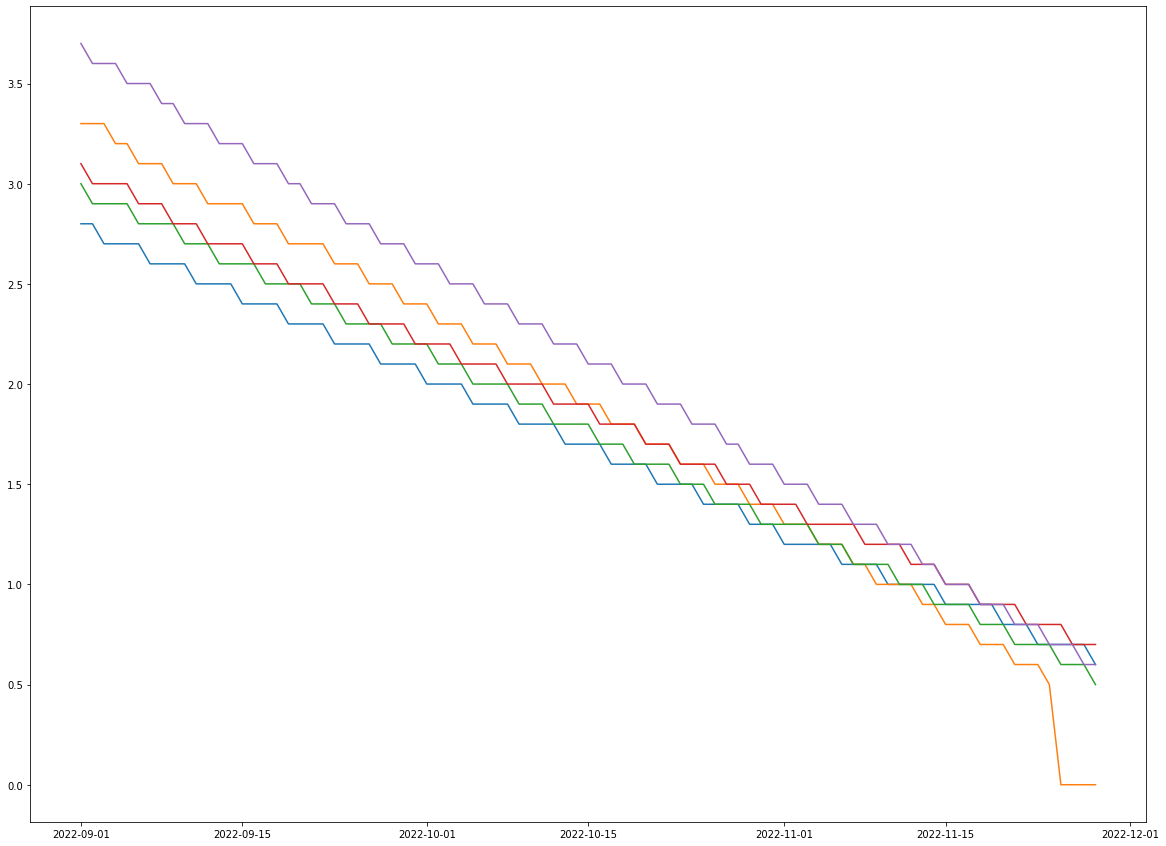

In [ ]:
ts = pd.date_range(start='2022-09-01', end='2022-11-28', freq='D')

idx_param = 0
plt.figure(figsize=(20,15))
for i in range(5):
    plt.plot(ts, train.iloc[i+idx_param, 4:93].values, label=f'{i}')
plt.show()

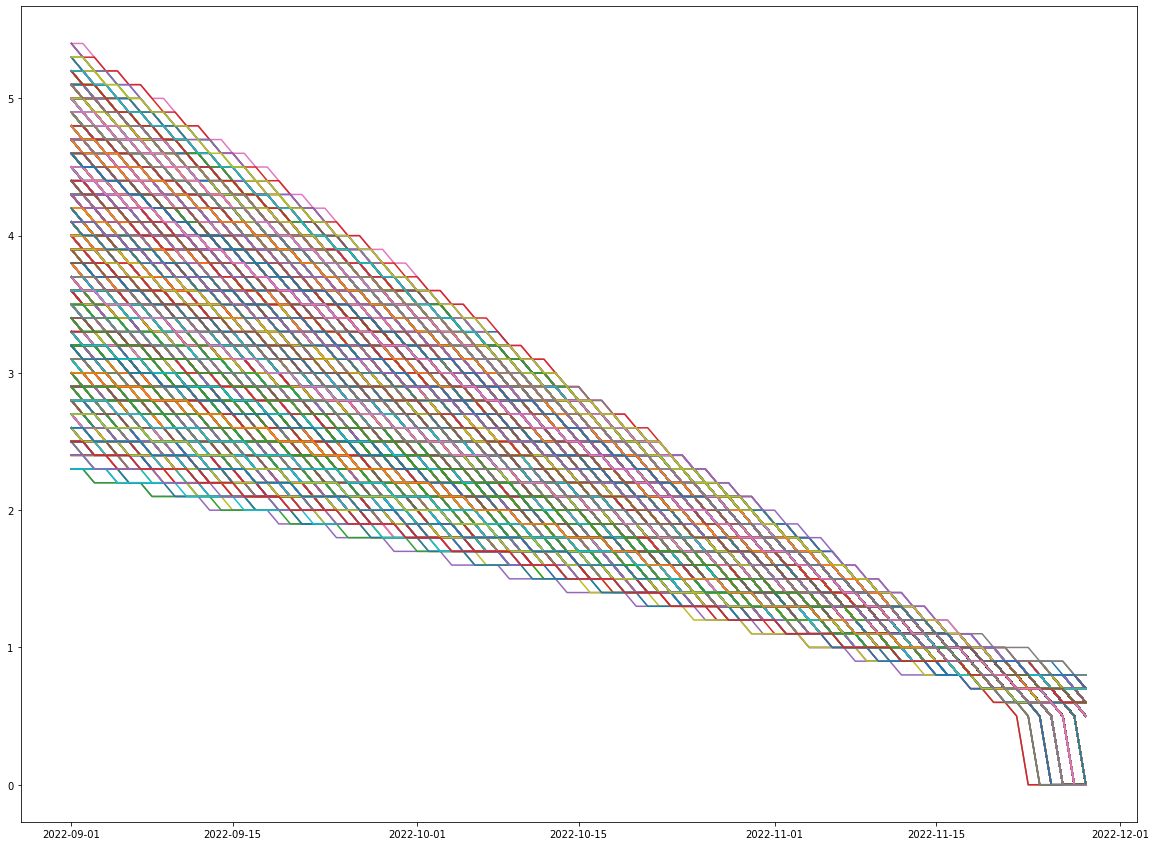

In [ ]:
idx_param = 0
plt.figure(figsize=(20,15))
for i in range(len(test)):
    plt.plot(ts, test.iloc[i+idx_param, 4:93].values, label=f'{i}')
plt.show()

In [ ]:
# train의 경우, 2022-11-24부터 새순이 없어진 경우가 있음. 이 case에 대해 라벨처리.
train[train['2022-11-24 새순']  == 0].shape

(9, 182)

In [ ]:
# test의 경우, 2022-11-23부터 새순이 없어진 경우가 있음. 이 case에 대해 라벨처리.
test[test['2022-11-23 새순'] == 0].shape

(2, 182)

In [ ]:
train['No_sprout'] = 0
for i in range(4,9):
    for idx in np.where(train[f'2022-11-2{i} 새순']  == 0):
        train.loc[idx, 'No_sprout'] += 1

In [ ]:
test['No_sprout'] = 0
for i in range(3,9):
    for idx in np.where(test[f'2022-11-2{i} 새순']  == 0):
        test.loc[idx, 'No_sprout'] += 1

In [ ]:
unix_ts = [time.mktime(t.timetuple()) for t in ts.to_pydatetime()]

slope_sprout = []
slope_chl = []
for i in range(len(train)):
    slope_sprout.append(np.polyfit(unix_ts[:-5],train.loc[i, '2022-09-01 새순':'2022-11-23 새순'].values, 1)[0] * 10**7)
    slope_chl.append(np.polyfit(unix_ts,train.loc[i, '2022-09-01 엽록소':'2022-11-28 엽록소'].values, 1)[0] * 10**6)

# 대략적으로 scaling 진행 ... 10**7
train['slope_sprout'] = slope_sprout
train['slope_chi'] = slope_chl

In [ ]:
slope_sprout = []
slope_chl = []
for i in range(len(test)):
    slope_sprout.append(np.polyfit(unix_ts[:-6],test.loc[i, '2022-09-01 새순':'2022-11-22 새순'].values, 1)[0] * 10**7)
    slope_chl.append(np.polyfit(unix_ts,test.loc[i, '2022-09-01 엽록소':'2022-11-28 엽록소'].values, 1)[0] * 10**6)

# 대략적으로 scaling 진행 ... 10**7
test['slope_sprout'] = slope_sprout
test['slope_chi'] = slope_chl

In [ ]:
train.head()

,수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,2022-09-05 새순,2022-09-06 새순,...,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소,No_sprout,slope_sprout,slope_chi
0,275.0,287.0,292.0,289.5,2.8,2.8,2.7,2.7,2.7,2.7,...,70.559603,70.427356,70.340491,70.293830,70.262422,70.169841,70.043251,0,-2.867328,-1.086940
1,293.0,284.0,336.0,310.0,3.3,3.3,3.3,3.2,3.2,3.1,...,71.092665,70.955608,70.796630,70.597550,70.565088,70.560502,70.427600,4,-3.815449,-1.255172
2,300.0,392.0,450.0,421.0,3.0,2.9,2.9,2.9,2.9,2.8,...,71.026740,70.920038,70.876723,70.710129,70.595971,70.418203,70.399578,0,-3.186298,-1.107577
3,289.0,368.0,379.0,373.5,3.1,3.0,3.0,3.0,3.0,2.9,...,69.794682,69.779813,69.614644,69.455404,69.281590,69.238689,69.133970,0,-3.104153,-1.182487
4,306.0,353.0,358.0,355.5,3.7,3.6,3.6,3.6,3.5,3.5,...,68.209458,68.040083,67.859963,67.775556,67.701456,67.504244,67.410093,0,-4.018056,-1.182073


In [ ]:
test.head()

,수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,2022-09-05 새순,2022-09-06 새순,...,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소,No_sprout,slope_sprout,slope_chi
0,231.0,219.0,302.0,260.5,4.3,4.2,4.2,4.1,4.1,4.1,...,71.858720,71.725540,71.531618,71.476935,71.321237,71.184295,71.000223,2,-5.012792,-1.218625
1,206.0,324.0,346.0,335.0,2.5,2.5,2.5,2.5,2.5,2.4,...,68.188159,67.995233,67.879958,67.744820,67.673522,67.539973,67.447849,0,-2.510526,-0.998894
2,282.0,373.0,404.0,388.5,4.7,4.7,4.6,4.6,4.5,4.5,...,74.070401,73.892408,73.796143,73.615838,73.440136,73.387051,73.228319,2,-5.623054,-1.143813
3,234.0,337.0,357.0,347.0,3.6,3.6,3.6,3.6,3.5,3.5,...,73.149298,73.109599,72.924511,72.847411,72.838263,72.672156,72.538171,1,-4.131168,-1.128775
4,222.0,329.0,347.0,338.0,2.7,2.7,2.7,2.7,2.6,2.6,...,71.905982,71.766141,71.746813,71.668847,71.501043,71.419715,71.328224,0,-2.749092,-1.213047


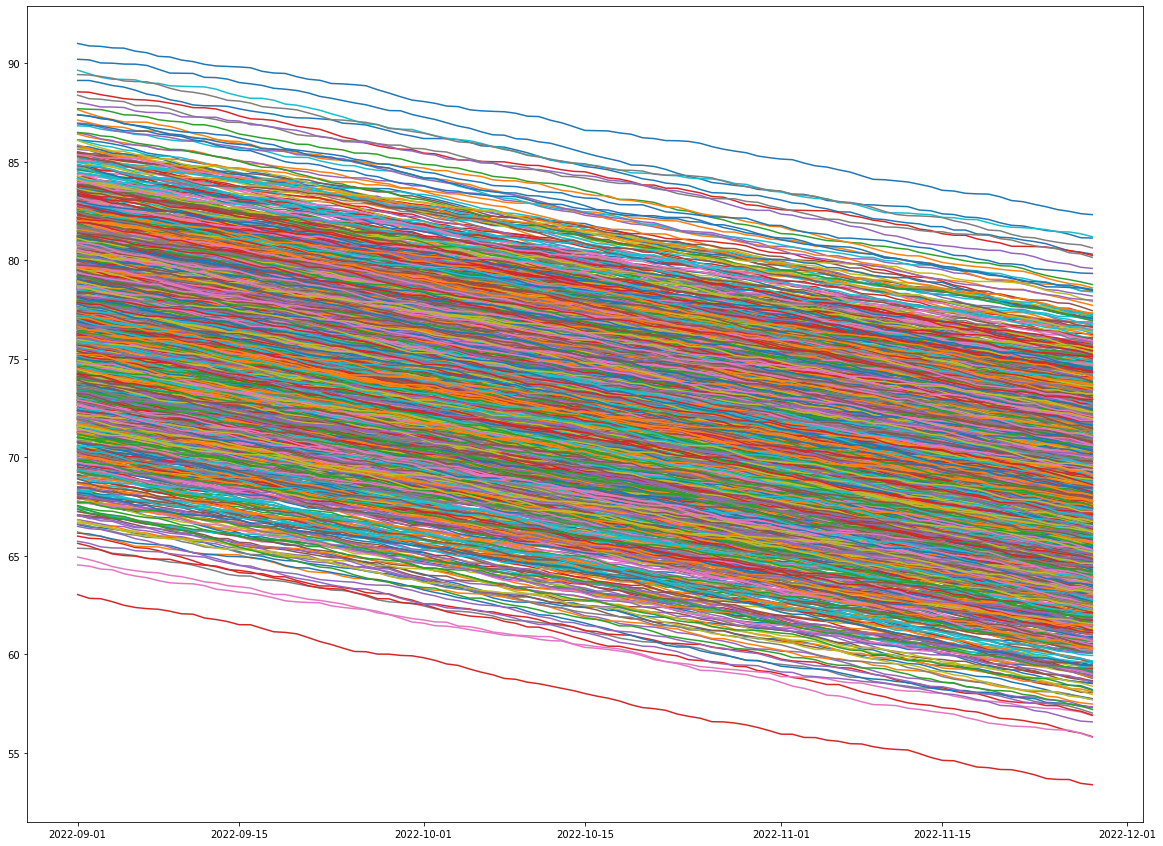

In [ ]:
plt.figure(figsize=(20,15))
for i in range(len(train)):
    plt.plot(ts, train.iloc[i+idx_param, 93:-3].values, label=f'{i}')
plt.show()

## 간단 상관관계 확인 및 전처리

In [ ]:
pd.concat([target, train], axis=1).corr()

,착과량(int),수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,2022-09-05 새순,...,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소,No_sprout,slope_sprout,slope_chi
착과량(int),1.000000,0.007002,0.021279,0.037168,0.030611,-0.980777,-0.980766,-0.980633,-0.980772,-0.980526,...,-0.010763,-0.011184,-0.010697,-0.010635,-0.010350,-0.010035,-0.009969,-0.680746,0.980229,-0.034390
수고(m),0.007002,1.000000,0.456394,0.484295,0.490456,-0.004329,-0.004161,-0.004863,-0.003260,-0.004864,...,0.022443,0.022312,0.022316,0.022915,0.022803,0.022593,0.022428,-0.012708,0.006729,0.014901
수관폭1(min),0.021279,0.456394,1.000000,0.841330,0.957948,-0.017625,-0.015392,-0.017317,-0.015037,-0.017852,...,0.001077,0.000732,0.000701,0.001012,0.000971,0.000502,0.000599,0.003046,0.015122,-0.012582
수관폭2(max),0.037168,0.484295,0.841330,1.000000,0.961049,-0.032941,-0.031595,-0.032226,-0.031397,-0.032521,...,-0.008202,-0.008366,-0.008514,-0.008198,-0.008068,-0.008396,-0.008324,-0.019827,0.032227,-0.012489
수관폭평균,0.030611,0.490456,0.957948,0.961049,1.000000,-0.026499,-0.024643,-0.025962,-0.024356,-0.026392,...,-0.003804,-0.004067,-0.004161,-0.003835,-0.003786,-0.004200,-0.004113,-0.008967,0.024840,-0.013063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-27 엽록소,-0.010035,0.022593,0.000502,-0.008396,-0.004200,0.012248,0.010720,0.008370,0.011297,0.009618,...,0.999521,0.999615,0.999717,0.999808,0.999899,1.000000,0.999902,-0.012385,-0.007905,0.155332
2022-11-28 엽록소,-0.009969,0.022428,0.000599,-0.008324,-0.004113,0.012134,0.010648,0.008281,0.011230,0.009529,...,0.999428,0.999516,0.999623,0.999715,0.999802,0.999902,1.000000,-0.012279,-0.007822,0.155515
No_sprout,-0.680746,-0.012708,0.003046,-0.019827,-0.008967,0.680243,0.681280,0.679568,0.680001,0.679712,...,-0.011333,-0.010600,-0.011540,-0.011472,-0.011512,-0.012385,-0.012279,1.000000,-0.712568,0.008346
slope_sprout,0.980229,0.006729,0.015122,0.032227,0.024840,-0.996880,-0.997018,-0.996791,-0.996774,-0.996719,...,-0.008582,-0.009150,-0.008613,-0.008546,-0.008293,-0.007905,-0.007822,-0.712568,1.000000,-0.039118


In [ ]:
drop_feats = train.loc[:, '2022-09-01 엽록소':'2022-11-28 엽록소'].columns
train = train.drop(columns=drop_feats)
test = test.drop(columns=drop_feats)

## Features에 대한 Plot 확인

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52265 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44284 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52265 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44284 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text

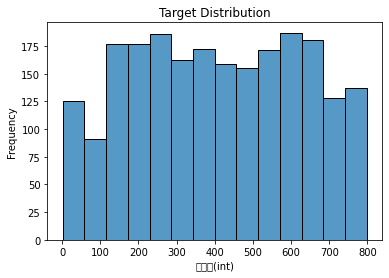

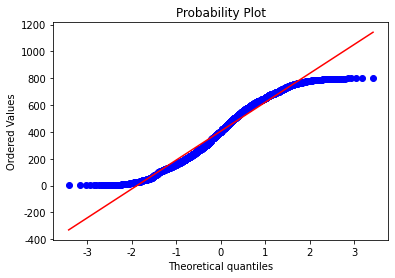

Skewness: -0.019


In [ ]:
# features의 히스토그램 파악.
sns.histplot(target['착과량(int)'])
plt.title('Target Distribution')
plt.ylabel('Frequency')
plt.figure()

qq = stats.probplot(np.array(target['착과량(int)']), plot=plt)
plt.show()
print("Skewness: {:.3f}".format(target['착과량(int)'].skew()))

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54253 missing from current font.
  font.set_text

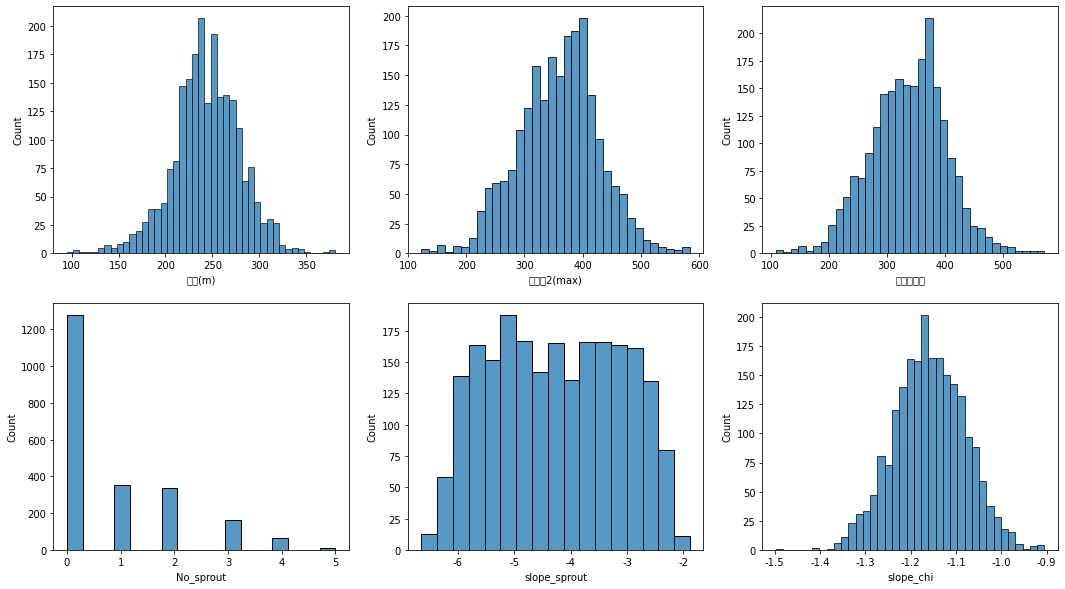

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.histplot(ax=axes[0, 0], data=train, x='수고(m)')
sns.histplot(ax=axes[0, 1], data=train, x='수관폭2(max)')
sns.histplot(ax=axes[0, 2], data=train, x='수관폭평균')
sns.histplot(ax=axes[1, 0], data=train, x='No_sprout')
sns.histplot(ax=axes[1, 1], data=train, x='slope_sprout')
sns.histplot(ax=axes[1, 2], data=train, x='slope_chi')

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52265 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44284 missing from current font.
  font.set_text

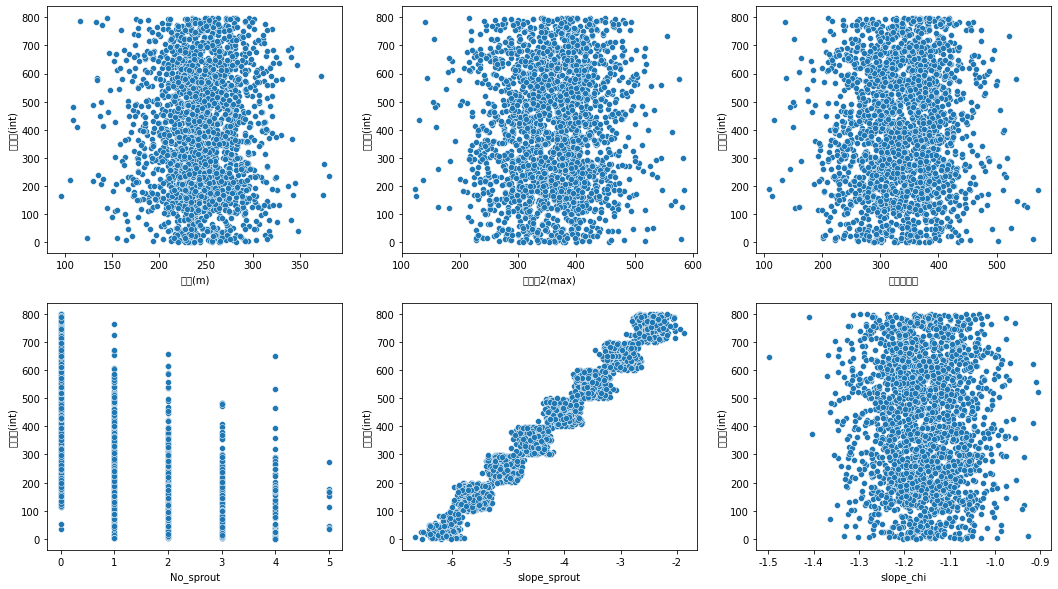

In [ ]:
# scatter plot
temp_df = pd.concat([train, target], axis=1)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.scatterplot(ax=axes[0, 0], data=temp_df, x='수고(m)', y='착과량(int)')
sns.scatterplot(ax=axes[0, 1], data=temp_df, x='수관폭2(max)', y='착과량(int)')
sns.scatterplot(ax=axes[0, 2], data=temp_df, x='수관폭평균', y='착과량(int)')
sns.scatterplot(ax=axes[1, 0], data=temp_df, x='No_sprout', y='착과량(int)')
sns.scatterplot(ax=axes[1, 1], data=temp_df, x='slope_sprout', y='착과량(int)')
sns.scatterplot(ax=axes[1, 2], data=temp_df, x='slope_chi', y='착과량(int)')

## 정규화

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [ ]:
def scaling(train, test, scaler):
    scaler = scaler
    scaled_train = pd.DataFrame(scaler.fit_transform(train), columns=train.columns)
    scaled_test = pd.DataFrame(scaler.transform(test), columns=test.columns)
    return scaled_train, scaled_test, scaler

mm_train, mm_test, mm_scaler = scaling(train, test, MinMaxScaler())
ss_train, ss_test, ss_scaler = scaling(train, test, StandardScaler())
rs_train, rs_test, rs_scaler = scaling(train, test, RobustScaler())
mm_train.head()

,수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,2022-09-05 새순,2022-09-06 새순,...,2022-11-22 새순,2022-11-23 새순,2022-11-24 새순,2022-11-25 새순,2022-11-26 새순,2022-11-27 새순,2022-11-28 새순,No_sprout,slope_sprout,slope_chi
0,0.629371,0.413793,0.366594,0.390270,0.166667,0.193548,0.166667,0.166667,0.172414,0.172414,...,0.50,0.4,0.777778,0.777778,0.777778,0.777778,0.666667,0.0,0.793364,0.693059
1,0.692308,0.407328,0.462039,0.434595,0.333333,0.354839,0.366667,0.333333,0.344828,0.310345,...,0.00,0.2,0.555556,0.000000,0.000000,0.000000,0.000000,0.8,0.594520,0.409131
2,0.716783,0.640086,0.709328,0.674595,0.233333,0.225806,0.233333,0.233333,0.241379,0.206897,...,0.25,0.4,0.777778,0.666667,0.666667,0.666667,0.555556,0.0,0.726468,0.658230
3,0.678322,0.588362,0.555315,0.571892,0.266667,0.258065,0.266667,0.266667,0.275862,0.241379,...,0.50,0.6,0.888889,0.888889,0.777778,0.777778,0.777778,0.0,0.743696,0.531802
4,0.737762,0.556034,0.509761,0.532973,0.466667,0.451613,0.466667,0.466667,0.448276,0.448276,...,0.50,0.6,0.777778,0.777778,0.777778,0.666667,0.666667,0.0,0.552028,0.532501


In [ ]:
def target_scaling(target, scaler):
    scaler = scaler
    scaled_target = pd.DataFrame(scaler.fit_transform(target), columns=target.columns)
    return scaled_target, scaler

mm_target, mm_Tscaler = target_scaling(target, MinMaxScaler())
ss_target, ss_Tscaler = target_scaling(target, StandardScaler())
rs_target, rs_Tscaler = target_scaling(target, RobustScaler())

## 프로토타입 모델 생성
- 적은 데이터 수 ... repeated kfold 이용
- 전부 float형, columns 수가 많으므로 일단 트리구조로 학습

In [ ]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 26.5 MB/s 
     |████████████████████████████████| 133 kB 73.3 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=0feb24d502cfc1c0b39d6ba4bf8bde7e21d7ebfdc9a5ce79d6bcd19b5cb4d5ba
  Stored in directory: /root/.cache/pip/wheels/85/ac/25/ffcd87ef8f9b1eec324fdf339359be71f22612459d8c75d89c
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incomp

In [ ]:
from sklearn.model_selection import train_test_split, KFold, RepeatedKFold, cross_val_score
from sklearn.metrics import mean_absolute_error

import lightgbm as lgb
from lightgbm import LGBMRegressor

# Permutation Importance로 features 선택
from eli5.lightgbm import *
from eli5.sklearn import *
import eli5

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(
    train, target, test_size=0.2, random_state=1234
)

1. prototype - LGBM 평균 mae:  31.936361691594197
2. 파생변수 추가 - LGBM 평균 mae:  32.345388333773464
3. 특정변수 제거 - LGBM 평균 mae:  32.59288119823972

In [ ]:
rkfold = RepeatedKFold(n_splits=5, random_state=1234)

lgbmR = LGBMRegressor(n_jobs=-1, random_state=1234)

scores = -cross_val_score(lgbmR,
                         X_train, y_train,
                         cv = rkfold, scoring="neg_mean_absolute_error",
                         n_jobs=-1)

print("LGBM 평균 mae: ", scores.mean())

LGBM 평균 mae:  31.535711529527006


In [ ]:
lgbmR.fit(X_train, y_train)

LGBMRegressor(random_state=1234)

In [ ]:
pred_temp = lgbmR.predict(X_valid).reshape(-1,1)

In [ ]:
mean_absolute_error(y_valid, pred_temp)

29.9902466362639

## 변수 선정

In [ ]:
features = list(X_train.columns)
perm = PermutationImportance(lgbmR, random_state=1234).fit(X_train, y_train)
explain_weights.explain_permutation_importance(perm, feature_names = features, top=40)

Weight,Feature
0.1191 ± 0.0037,2022-09-02 새순
0.0916 ± 0.0035,2022-09-07 새순
0.0650 ± 0.0029,slope_sprout
0.0176 ± 0.0016,2022-09-01 새순
0.0143 ± 0.0013,2022-09-09 새순
0.0084 ± 0.0011,2022-09-05 새순
0.0046 ± 0.0003,2022-09-06 새순
0.0045 ± 0.0003,slope_chi
0.0045 ± 0.0005,2022-09-03 새순
0.0039 ± 0.0003,2022-09-10 새순


In [ ]:
train['avg_0910'] = train.loc[:,"2022-09-01 새순":"2022-09-10 새순"].mean(axis=1)
test['avg_0910'] = test.loc[:,"2022-09-01 새순":"2022-09-10 새순"].mean(axis=1)

In [ ]:
selected_feats = ['수고(m)',
                  '수관폭1(min)',
                  '수관폭2(max)',
                  'slope_sprout',
                  'slope_chi',
                  'avg_0910']

In [ ]:
new_train = train[selected_feats]
new_test = test[selected_feats]

1. prototype - LGBM 평균 mae:  31.936361691594197
2. 파생변수 추가 - LGBM 평균 mae:  32.345388333773464
3. 특정변수 제거 - LGBM 평균 mae:  32.59288119823972
4. 변수선택 - LGBM 평균 mae:  32.27563995644202

## 모델링
1. 전체 features case
    - RF
    - XGB
    - LGBM

2. 변수선정 + 다중공선성 제거 case
    - SVM
    - RF
    - Lasso
    - Ridge
    - ElNet

3. 최소한의 변수만 고려한 case
    - SVM
    - Lasso
    - Ridge
    - ElNet

In [ ]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 348 kB 19.6 MB/s 
     |████████████████████████████████| 81 kB 9.7 MB/s 
     |████████████████████████████████| 209 kB 86.9 MB/s 
     |████████████████████████████████| 78 kB 9.2 MB/s 
     |████████████████████████████████| 50 kB 7.4 MB/s 
     |████████████████████████████████| 147 kB 79.5 MB/s 
     |████████████████████████████████| 112 kB 77.0 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=1b307c50783e19755db23d48350cc69ea0f3d670e6c64b1087ef039d5628e692
  Stored in directory: /root/.cache/pip/wheels/7f/1a/65/84ff8c386bec21fca6d220ea1f5498a0367883a78dd5ba6122
Successfully built pyperclip


In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,learning_curve, cross_val_score, KFold, RepeatedKFold, train_test_split, cross_val_score

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.linear_model import LassoCV,ElasticNetCV,Lasso,ElasticNet, Ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR

from sklearn.ensemble import VotingRegressor
from mlxtend.regressor import StackingRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error

# 모델 저장 및 로드
import joblib
import pickle

import optuna

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(
    new_train, target, test_size=0.2, random_state=1234
)
rkfold = RepeatedKFold(n_splits=5, random_state=1234)

### RF

In [ ]:
#### RandomForest
#### LightGBM
rf = RandomForestRegressor(random_state=1234, n_jobs=-1)

def rf_objective(trial):
    params = {
        "max_features" : trial.suggest_categorical("max_features", ["sqrt", "log2"]),
        "criterion" : trial.suggest_categorical("criterion", ["absolute_error"]),
        "n_estimators" : trial.suggest_int("n_estimators", 800, 1200),
        "min_samples_split" : trial.suggest_int("min_samples_split", 2, 30),
        "min_samples_leaf" : trial.suggest_int("min_samples_leaf", 1, 80),
        "max_depth" : trial.suggest_int("max_depth", 2, 50),
    }
    
    rf = RandomForestRegressor(n_jobs=-1, random_state=1234, **params)

    rf.fit(X_train, y_train.values.ravel())
    
    scores = cross_val_score(rf, X_train, y_train.values.ravel(), cv=rkfold, scoring="neg_mean_absolute_error", n_jobs=-1)
    mae_mean = scores.mean()
    
    return mae_mean

rf_optuna = optuna.create_study(direction="maximize")
rf_optuna.optimize(rf_objective, n_trials=50)

[I 2022-12-13 17:36:07,743] A new study created in memory with name: no-name-99cd06fd-1818-4b3c-8e6b-d60dd4061668
[I 2022-12-13 17:39:22,626] Trial 0 finished with value: -37.14305162243371 and parameters: {'max_features': 'sqrt', 'criterion': 'absolute_error', 'n_estimators': 975, 'min_samples_split': 14, 'min_samples_leaf': 61, 'max_depth': 42}. Best is trial 0 with value: -37.14305162243371.
[I 2022-12-13 17:43:54,426] Trial 1 finished with value: -32.070218050149364 and parameters: {'max_features': 'log2', 'criterion': 'absolute_error', 'n_estimators': 1138, 'min_samples_split': 11, 'min_samples_leaf': 28, 'max_depth': 37}. Best is trial 1 with value: -32.070218050149364.
[I 2022-12-13 17:46:57,552] Trial 2 finished with value: -36.692885615780945 and parameters: {'max_features': 'sqrt', 'criterion': 'absolute_error', 'n_estimators': 908, 'min_samples_split': 5, 'min_samples_leaf': 59, 'max_depth': 31}. Best is trial 1 with value: -32.070218050149364.
[I 2022-12-13 17:51:11,677] Tr

In [ ]:
print(rf_optuna.best_trial.params)
print("="*150)
print(rf_optuna.best_trial.values)
optuna.visualization.plot_optimization_history(rf_optuna)
optuna.visualization.plot_param_importances(rf_optuna)

{'max_features': 'log2', 'criterion': 'absolute_error', 'n_estimators': 1096, 'min_samples_split': 26, 'min_samples_leaf': 1, 'max_depth': 7}
[-30.54303891073213]


In [ ]:
bp = rf_optuna.best_params

opt_rf = RandomForestRegressor(
    n_jobs = -1,
    random_state = 1234,
    **bp
)

opt_rf.fit(X_train, y_train)
pred = opt_rf.predict(new_test)

joblib.dump(opt_rf, './opt_rf2_case2.pkl')

submission = pd.read_csv("./data/sample_submission.csv")
submission.iloc[:,1] = pred
submission.to_csv('Trial_OPT_RF2(case2).csv', encoding='utf-8', index=False)

<ipython-input-188-48a643e8dc83>:9: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



### LightGBM

In [ ]:
new_train.drop(columns="수관폭1(min)", inplace=True)
new_test.drop(columns="수관폭1(min)", inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(
    new_train, target, test_size=0.2, random_state=1234
)
rkfold = RepeatedKFold(n_splits=6, random_state=1234)

In [ ]:
#### LightGBM
lgbr = LGBMRegressor(random_state=1234, n_jobs=-1)

def lgbm_objective(trial):
    params = {
        "boosting_type" : trial.suggest_categorical("boosting_type", ["gbdt"]), 
        "subsample" : trial.suggest_float("subsample", 0.1, 0.9),
        "n_estimators" : trial.suggest_int("n_estimators", 500, 3000),
        "learning_rate" : trial.suggest_float("learning_rate", 0.01, 0.8),
        "reg_alpha" : trial.suggest_float("reg_alpha", 1e-6, 1e3),
        "reg_lambda" : trial.suggest_float("reg_lambda", 1e-6, 1e3),
    }
    
    lgbm = LGBMRegressor(n_jobs=-1, random_state=1234, **params)

    lgbm.fit(X_train, y_train)
    
    scores = cross_val_score(lgbm, X_train, y_train, cv=rkfold, scoring="neg_mean_absolute_error", n_jobs=-1)
    mae_mean = scores.mean()
    
    return mae_mean

lgbm_optuna = optuna.create_study(direction="maximize")
lgbm_optuna.optimize(lgbm_objective, n_trials=100)

[I 2022-12-13 17:24:58,168] A new study created in memory with name: no-name-1e1f5f2d-2353-444c-9dcc-6283824bf9b2
[I 2022-12-13 17:25:01,820] Trial 0 finished with value: -31.205428388612702 and parameters: {'boosting_type': 'gbdt', 'subsample': 0.5496771851999291, 'n_estimators': 645, 'learning_rate': 0.40870576253197294, 'reg_alpha': 359.65320957435756, 'reg_lambda': 283.8390926819804}. Best is trial 0 with value: -31.205428388612702.
[I 2022-12-13 17:25:04,363] Trial 1 finished with value: -31.14709134383563 and parameters: {'boosting_type': 'gbdt', 'subsample': 0.37990775372903074, 'n_estimators': 1744, 'learning_rate': 0.5672249598347873, 'reg_alpha': 467.1260585325996, 'reg_lambda': 194.57393606640872}. Best is trial 1 with value: -31.14709134383563.
[I 2022-12-13 17:25:08,202] Trial 2 finished with value: -31.065446008630712 and parameters: {'boosting_type': 'gbdt', 'subsample': 0.14233770676837862, 'n_estimators': 2996, 'learning_rate': 0.498489988599242, 'reg_alpha': 867.10493

In [ ]:
print(lgbm_optuna.best_trial.params)
print("="*150)
print(lgbm_optuna.best_trial.values)
optuna.visualization.plot_optimization_history(lgbm_optuna)
optuna.visualization.plot_param_importances(lgbm_optuna)

{'boosting_type': 'gbdt', 'subsample': 0.7430560991973898, 'n_estimators': 2075, 'learning_rate': 0.07443700492942196, 'reg_alpha': 793.5022568160596, 'reg_lambda': 441.5321241803656}
[-30.608388294972073]


In [ ]:
bp = lgbm_optuna.best_params

opt_lgbm = LGBMRegressor(
    n_jobs = -1,
    random_state = 1234,
    **bp
)

opt_lgbm.fit(X_train, y_train)
pred = opt_lgbm.predict(new_test)

joblib.dump(opt_lgbm, './lgbm_final1_case2.pkl')

submission = pd.read_csv("./data/sample_submission.csv")
submission.iloc[:,1] = pred
submission.to_csv('Trial_LGBM_final1(case2).csv', encoding='utf-8', index=False)

### Lasso

In [ ]:
#### Lasso
lasso_model = Lasso(random_state=1234, n_jobs=-1)

lasso_parameters= {
    "alpha" : [0.000001, 0.0001,0.001, 0.01, 0.1, 1, 5, 10],
    "tol" : [0.0000001, 0.00001, 0.001],
    "max_iter" : [1000,3000],
    "selection" : ["cyclic", "random"]
}

n_iter = 20
lasso_rgs_model = RandomizedSearchCV(
    lasso_model,
    param_distributions=lasso_parameters,
    n_iter = n_iter,
    cv=rkfold,
    scoring = "neg_mean_absolute_error",
    random_state=1234,
    n_jobs=-1
)
lasso_rgs_model.fit(X_train, y_train)
print(lasso_rgs_model.best_score_)
print(lasso_rgs_model.best_params_)

-34.50756527828327
{'tol': 1e-07, 'selection': 'cyclic', 'max_iter': 3000, 'alpha': 0.1}


In [ ]:
# grid search
lasso_model = Lasso(random_state=1234)
lasso_parameters= {
    "alpha" : [0.8, 0.1, 0.15],
    "tol" : [0.00001, 0.0001, 0.001],
    "max_iter" : [500, 1000, 2000],
    'selection': ["cyclic", "random"]
}

n_iter = 20
lasso_gs_model = GridSearchCV(
    lasso_model,
    param_grid=lasso_parameters,
    cv=rkfold,
    scoring = "neg_mean_absolute_error",
    n_jobs=-1
)
lasso_gs_model.fit(X_train, y_train)
print(lasso_gs_model.best_score_)
print(lasso_gs_model.best_params_)

-34.50297397461875
{'alpha': 0.1, 'max_iter': 1000, 'selection': 'random', 'tol': 1e-05}


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.985e+03, tolerance: 8.433e+02
  model = cd_fast.enet_coordinate_descent(


In [ ]:
lasso_gs_best = lasso_gs_model.best_estimator_
pred = lasso_gs_best.predict(test)

joblib.dump(lasso_gs_model, './lasso_case1.pkl')

submission = pd.read_csv("./data/sample_submission.csv")
submission.iloc[:,1] = pred
submission.to_csv('Trial_LGBM(case1).csv', encoding='utf-8', index=False)

### ElNet

In [ ]:
#### ElasticNet Regression

def elnet_objective(trial):
    params = {
        "selection" : trial.suggest_categorical("selection", ["cyclic", "random"]),
        "max_iter" : trial.suggest_int("max_iter", 5, 3000),
        "alpha" : trial.suggest_loguniform("alpha", 1e-6, 1e3),
        "l1_ratio" : trial.suggest_loguniform("l1_ratio", 0.1, 0.9),
    }
    
    elnet_model = ElasticNet(random_state=1234, **params)

    elnet_model.fit(X_train, y_train)
    
    scores = cross_val_score(elnet_model, X_train, y_train, cv=rkfold, scoring="neg_mean_absolute_error", n_jobs=-1)
    mae_mean = scores.mean()
    
    return mae_mean

elnet_optuna = optuna.create_study(direction="maximize")
elnet_optuna.optimize(elnet_objective, n_trials=100)

[I 2022-12-13 14:53:25,426] A new study created in memory with name: no-name-b93bf5c9-5ea8-43c8-8c73-17ecf3792e27
<ipython-input-46-82533ff7dcb5>:7: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-46-82533ff7dcb5>:8: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

[I 2022-12-13 14:53:26,658] Trial 0 finished with value: -182.6899390688173 and parameters: {'selection': 'random', 'max_iter': 420, 'alpha': 57.622786725626206, 'l1_ratio': 0.10426851086087918}. Best is trial 0 with value: -182.6899390688173.
<ipython-input-46-82533ff7dcb5>:7: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in

In [ ]:
print(elnet_optuna.best_trial.params)
print("="*150)
print(elnet_optuna.best_trial.values)
optuna.visualization.plot_optimization_history(elnet_optuna)

{'selection': 'cyclic', 'max_iter': 2162, 'alpha': 0.0003380562168320646, 'l1_ratio': 0.6374201901447055}
[-34.52558268944354]


In [ ]:
optuna.visualization.plot_param_importances(elnet_optuna)

In [ ]:
bp = elnet_optuna.best_params

opt_elnet = ElasticNet(
    random_state = 1234,
    **bp
)

opt_elnet.fit(X_train, y_train)
pred = opt_elnet.predict(new_test)

joblib.dump(opt_elnet, './elnet_case2.pkl')

submission = pd.read_csv("./data/sample_submission.csv")
submission.iloc[:,1] = pred
submission.to_csv('Trial_Elnet(case2).csv', encoding='utf-8', index=False)

### Ridge

In [ ]:
#### Ridge
kr_model = KernelRidge()
kr_parameters={
    "alpha" : [0.000001, 0.001, 1, 5, 10],
    "kernel":["linear", "rbf", "polynomial"],
    "gamma" : np.logspace(-15, 4, num=4, base=2),
    "degree" : [2,3,4],
}

n_iter_search =20

kr_rgs_model = RandomizedSearchCV(
    kr_model, 
    param_distributions=kr_parameters,
    n_iter = n_iter_search,
    cv=rkfold,
    random_state=1234,
    n_jobs=-1,
    scoring="neg_mean_absolute_error"
)
kr_rgs_model.fit(X_train, y_train)

print(kr_rgs_model.best_score_)
print(kr_rgs_model.best_params_)

-35.77624331082568
{'kernel': 'polynomial', 'gamma': 0.002460783300575922, 'degree': 3, 'alpha': 5}


In [ ]:
kr_model = KernelRidge()
kr_parameters= {
    "kernel" : ["polynomial", "linear", "rbf"],
    "alpha" : [2, 5, 8],
    "gamma" : [0.002, 0.003, 0.004],
    "degree" : [3],
}

kr_gs_model = GridSearchCV(
    kr_model,
    param_grid=kr_parameters,
    cv=rkfold,
    scoring = "neg_mean_absolute_error",
    n_jobs=-1
)
kr_gs_model.fit(X_train, y_train)
print(kr_gs_model.best_score_)
print(kr_gs_model.best_params_)

-35.726641760385746
{'alpha': 2, 'degree': 3, 'gamma': 0.002, 'kernel': 'polynomial'}


In [ ]:
kr_gs_best = kr_gs_model.best_estimator_
pred = kr_gs_best.predict(new_test)

joblib.dump(kr_gs_model, './kridge_case2.pkl')

submission = pd.read_csv("./data/sample_submission.csv")
submission.iloc[:,1] = pred
submission.to_csv('Trial_kridge(case2).csv', encoding='utf-8', index=False)

### SVR

In [ ]:
y_train.shape

(1765, 1)

In [ ]:
#### SVR
svr = SVR()

def svr_objective(trial):
    params = {
       "kernel" : trial.suggest_categorical('kernel', ['linear','rbf', 'sigmoid','poly'])
       "gamma" : trial.suggest_float('gamma',1e-5,1e1),
       "C" : trial.suggest_float('C',1e-3,1e1),
       "epsilon" : trial.suggest_float('epsilon',1e-4, 1),
    }

    svr = SVR(**params)

    svr.fit(X_train, y_train.values.ravel())

    scores = cross_val_score(svr, X_train, y_train.values.ravel(), cv=rkfold, scoring="neg_mean_absolute_error", n_jobs=-1)
    mae_mean = scores.mean()
    return mae_mean

svr_optuna = optuna.create_study(direction="maximize")
svr_optuna.optimize(svr_objective, n_trials=100)

[I 2022-12-13 16:20:21,691] A new study created in memory with name: no-name-d9144ccb-6a62-453c-8cdf-ccef7a0ecdcc
[I 2022-12-13 16:20:21,810] Trial 0 finished with value: -0.2362686816190618 and parameters: {'kernel': 'linear', 'gamma': 0.5453272415932934, 'C': 0.4168677853402565, 'epsilon': 0.909577142417267}. Best is trial 0 with value: -0.2362686816190618.
[I 2022-12-13 16:20:21,896] Trial 1 finished with value: -0.2362686816190618 and parameters: {'kernel': 'linear', 'gamma': 8.238942722635743, 'C': 2.9233662994691074, 'epsilon': 0.8410451970841448}. Best is trial 0 with value: -0.2362686816190618.
[I 2022-12-13 16:20:21,982] Trial 2 finished with value: -0.2362686816190618 and parameters: {'kernel': 'linear', 'gamma': 5.201758163544551, 'C': 6.191041791669371, 'epsilon': 0.6224492106584145}. Best is trial 0 with value: -0.2362686816190618.
[I 2022-12-13 16:20:22,082] Trial 3 finished with value: -0.05203515216158036 and parameters: {'kernel': 'linear', 'gamma': 0.373997159277802, 

In [ ]:
print(svr_optuna.best_trial.params)
print("="*150)
print(svr_optuna.best_trial.values)
optuna.visualization.plot_optimization_history(svr_optuna)

{'kernel': 'linear', 'gamma': 4.61792921532596, 'C': 7.339962745358553, 'epsilon': 0.10167924427717664}
[-0.04318105676812496]


In [ ]:
optuna.visualization.plot_param_importances(svr_optuna)

In [ ]:
bp = svr_optuna.best_params

opt_svr = SVR(**bp)

opt_svr.fit(X_train, y_train)
pred_temp = opt_svr.predict(mm_test).reshape(-1,1)
pred = mm_Tscaler.inverse_transform(pred_temp)

joblib.dump(opt_svr, './svr_MaxMax_case2.pkl')

submission = pd.read_csv("./data/sample_submission.csv")
submission.iloc[:,1] = pred
submission.to_csv('Trial_SVR_MinMax(case2).csv', encoding='utf-8', index=False)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
submission

,ID,착과량(int)
0,TEST_0000,265.990377
1,TEST_0001,744.607684
2,TEST_0002,145.481377
3,TEST_0003,439.171801
4,TEST_0004,695.067905
...,...,...
2203,TEST_2203,762.192037
2204,TEST_2204,304.627849
2205,TEST_2205,388.365625
2206,TEST_2206,211.011215
